In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

In [ ]:
def stacked_bar_width_plot(df, value_cols, width_col, colors=None, **subplot):
    """A stacked column plot with variable bar width.
       :param df
       :param list value_cols: columns of `df`, already normalized (sum=1 for every line).
       :param str width_col: column of `df`, unbounded, used (i) as label (ii) to compute width.
       :param dict subplot: optional figure/row/col
    """
    categories = df.index.to_list()
    width = df[width_col]
    htmpl = width_col + ': %{customdata}, %{y}'
    x = np.cumsum([0] + list(width[:-1]))
    #colors = ["#476c8a", "#49657b", "#7f8e9e"] # or [None, ] * len(value_cols) # Table 1
    #colors = ["#F8B195", "#F67280", "#6C5B7B", "#355C7D"] # or [None, ] * len(value_cols)   # Table 2
    colors = ["#2C3E50", "#0081AF", "#00ABE7", "#2DC7FF", "#EAD2AC", "#EABA6B", "#B5754A"] # or [None, ] * len(value_cols)   # Table 3



    figure = subplot.pop('figure', go.Figure())
    for colname, color in zip(value_cols, colors):
        figure.add_trace(go.Bar(name=colname, x=x, y=df[colname], text=round(100*df[colname],1), width=width, hovertemplate=htmpl, customdata=width, offset=0, marker_color=color), **subplot)
        figure.update_layout(autosize=False, width=1400, height=800)
    return figure.update_xaxes(
        tickvals=x + np.array(width) / 2,
        ticktext=categories,
        range=[0, np.sum(width)], **subplot
    ) \
        .update_yaxes(tickformat=',.0%', range=[0, 1], row=subplot.get('row'), col=subplot.get('col')) \
        .update_layout(barmode='stack', bargap=0)

In [ ]:

def mekko_plot(df, unit_name=None, colors=None, **subplot):
    """A mekko plot is a normalized stacked column plot with variable bar width.

       :param DataFrame df: already indexed by category, with only numeric columns:
                   there will be one stacked-bar per line (X), labeled after the index, with one bar per column.
       :param str unit_name: used to populate hover.
       :param list colors: color of each column. None for default palette (blue, red, ...).
       The rest (title..) is easily added afterwards.
    """
    # Normalize then defer to stacked_bar_width_plot plot.
    value_cols = df.columns
    w = pd.DataFrame({unit_name: df.sum(axis='columns')})
    w[value_cols] = df.div(w[unit_name], axis='index')

    return stacked_bar_width_plot(w, value_cols, width_col=unit_name, colors=colors, **subplot)


In [ ]:
# Table 1
df = pd.DataFrame(dict(ESCPM_species=['Enterobacter cloacae complex','Klebsiella aerogenes','Enterobacter non-cloacae complex','Serratia marcescens',
                                      'Citrobacter freundii complex','Providencia species','Morganella morganii'],
                       Year_2020=[926, 296, 57 , 452 , 126, 53, 170],
                       Year_2021=[1062 , 307 , 51 , 582 , 133 , 55 , 212],
                       Year_2022=[1048 , 295 , 55,  503 , 146 , 63, 182 ]
                       )).set_index('ESCPM_species')

#display(df)

mekko_plot(df, unit_name='some_label')

In [ ]:
# Table 2
df = pd.DataFrame(dict(ESCPM_species=['Enterobacter cloacae complex','Klebsiella aerogenes','Enterobacter non-cloacae complex','Serratia marcescens',
                                      'Citrobacter freundii complex','Providencia species','Morganella morganii'],
                       Emergency=[480, 142, 23 , 197 , 114, 40, 176],
                       Medical_ward=[1260 , 294 , 72 , 490 , 154 , 47 , 201],
                       Surgical_ward=[457 , 131 , 18,  229 , 72 , 8, 74 ],
                       ICU=[839 , 331, 50 , 621 , 65, 76 , 113]
                       )).set_index('ESCPM_species')

#display(df)

mekko_plot(df, unit_name='some_label')

In [ ]:
# Table 3
df = pd.DataFrame(dict(ESCPM_species=['3rd generation cephalosporins-susceptible','3rd generation cephalosporins-resistant','3rd-4th generation cephalosporins-resistant','Carbapenem-resistant',
                                      'ESBL-producers','AmpC-overproducers','Carbapenemase-producers'],
                       Enterobacter_cloacae_complex=[1955, 459, 225 , 389 , 297, 318, 104],
                       Klebsiella_aerogenes=[497 , 267 , 31 , 100 , 24 , 176 , 21],
                       Enterobacter_non_cloacae_complex=[109 , 25 , 9,  20 , 7 ,20, 2 ],
                       Serratia_marcescens=[1356 , 124, 28 , 24 , 25, 43 , 16],
                       Citrobacter_freundii_complex=[294 , 83, 11 , 16 , 12, 38 , 10],
                       Providencia_species=[79 , 17, 2 , 73 , 4, 8 , 50],
                       Morganella_morganii=[450 , 84, 6 , 21 , 5, 38 , 2]
                       )).set_index('ESCPM_species')

#display(df)

mekko_plot(df, unit_name='some_label')

In [ ]:
# Table 4

Susceptibility_1 = [
    {"name": "FEP", "value": 0},
    {"name": "TZP", "value": 98.1},
    {"name": "C/T", "value": 99.6},
    {"name": "CZA", "value": 100},
    {"name": "CARB", "value": 0},
    {"name": "CL", "value": 93.4},
    {"name": "FF", "value": 75.8},
    {"name": "AM", "value": 98},
    {"name": "FQ", "value": 95.8},
    {"name": "SMX/TMP", "value": 93.7}
]


Susceptibility_2 = [
    {"name": "FEP", "value": 0},
    {"name": "TZP", "value": 29.8},
    {"name": "C/T", "value": 67.6},
    {"name": "CZA", "value": 98.2},
    {"name": "CARB", "value": 0},
    {"name": "CL", "value": 90.3},
    {"name": "FF", "value": 71.1},
    {"name": "AM", "value": 89.6},
    {"name": "FQ", "value": 87.1},
    {"name": "SMX/TMP", "value": 84.9}
]


Susceptibility_3 = [
    {"name": "FEP", "value": 0},
    {"name": "TZP", "value": 31.7},
    {"name": "C/T", "value": 66},
    {"name": "CZA", "value": 95.7},
    {"name": "CARB", "value": 0},
    {"name": "CL", "value": 90.7},
    {"name": "FF", "value": 77.7},
    {"name": "AM", "value": 44.3},
    {"name": "FQ", "value": 32.9},
    {"name": "SMX/TMP", "value": 36.4}
]


Susceptibility_4 = [
    {"name": "FEP", "value": 48.8},
    {"name": "TZP", "value": 10.4},
    {"name": "C/T", "value": 15.4},
    {"name": "CZA", "value": 66},
    {"name": "CARB", "value": 0},
    {"name": "CL", "value": 85.8},
    {"name": "FF", "value": 65.4},
    {"name": "AM", "value": 65.8},
    {"name": "FQ", "value": 53.8},
    {"name": "SMX/TMP", "value": 53.2}
]


Susceptibility_5 = [
    {"name": "FEP", "value": 20.9},
    {"name": "TZP", "value": 32.2},
    {"name": "C/T", "value": 58.3},
    {"name": "CZA", "value": 94.3},
    {"name": "CARB", "value": 79.2},
    {"name": "CL", "value": 93},
    {"name": "FF", "value": 77.3},
    {"name": "AM", "value": 41},
    {"name": "FQ", "value": 29.3},
    {"name": "SMX/TMP", "value": 26.8}
]


Susceptibility_6 = [
    {"name": "FEP", "value": 84.4},
    {"name": "TZP", "value": 22.1},
    {"name": "C/T", "value": 45.5},
    {"name": "CZA", "value": 98.1},
    {"name": "CARB", "value": 73.9},
    {"name": "CL", "value": 93.8},
    {"name": "FF", "value": 80.2},
    {"name": "AM", "value": 89.9},
    {"name": "FQ", "value": 86.7},
    {"name": "SMX/TMP", "value": 88.1}
]


Susceptibility_7 = [
    {"name": "FEP", "value": 20.6},
    {"name": "TZP", "value": 1},
    {"name": "C/T", "value": 10},
    {"name": "CZA", "value": 43.7},
    {"name": "CARB", "value": 6.3},
    {"name": "CL", "value": 94.6},
    {"name": "FF", "value": 69.7},
    {"name": "AM", "value": 36.6},
    {"name": "FQ", "value": 24.5},
    {"name": "SMX/TMP", "value": 22.4}
]


In [ ]:
def horizontal_bar_labels(categories):
    subplots = make_subplots(
        rows=len(categories),
        cols=1,
        subplot_titles=[x["name"] for x in categories],
        shared_xaxes=True,
        print_grid=False,
        vertical_spacing=(0.45 / len(categories)),
    )
    subplots['layout'].update(
        width=550,
        plot_bgcolor='#fff',
    )

    # add bars for the categories
    for k, x in enumerate(categories):
        subplots.add_trace(dict(
            type='bar',
            orientation='h',
            y=[x["name"]],
            x=[x["value"]],
            text=["{:,.1f}".format(x["value"])],
            hoverinfo='text',
            textposition='auto',
            marker=dict(
                color="black",
            ),
        ), k+1, 1)

    # update the layout
    subplots['layout'].update(
        showlegend=False,
    )
    for x in subplots["layout"]['annotations']:
        x['x'] = 0
        x['xanchor'] = 'left'
        x['align'] = 'left'
        x['font'] = dict(
            size=12,
        )

    # hide the axes
    for axis in subplots['layout']:
        if axis.startswith('yaxis') or axis.startswith('xaxis'):
            subplots['layout'][axis]['visible'] = False

    # update the margins and size
    subplots['layout']['margin'] = {
        'l': 0,
        'r': 0,
        't': 20,
        'b': 1,
    }
    height_calc = 20 * len(categories)
    height_calc = max([height_calc, 350])
    subplots['layout']['height'] = height_calc
    subplots['layout']['width'] = height_calc

    return subplots

In [ ]:
horizontal_bar_labels(Susceptibility_1)

In [ ]:
horizontal_bar_labels(Susceptibility_2)

In [ ]:
horizontal_bar_labels(Susceptibility_3)

In [ ]:
horizontal_bar_labels(Susceptibility_4)

In [ ]:
horizontal_bar_labels(Susceptibility_5)

In [ ]:
horizontal_bar_labels(Susceptibility_6)

In [ ]:
horizontal_bar_labels(Susceptibility_7)

In [ ]:
# Supplementary Figure S5 *** IGNORE ***

df = pd.DataFrame(dict(Antibiotic=['Piperacillin/tazobactam EUCAST', 'Piperacillin/tazobactam CLSI', 'Cefoxitin', 'Cefotaxime EUCAST', 'Cefotaxime CLSI', 'Ceftriaxone', 'Ceftazidime EUCAST', 'Ceftazidime CLSI', 'Cefepime',
                                   'Ceftolozane/tazobactam', 'Ceftazidime/avibactam EUCAST', 'Ertapenem',
                                   'Imipenem', 'Meropenem', 'Tigecycline', 'Gentamycin', 'Amikacin', 'Ciprofloxacin', 'Levofloxacin', 'Sulfamethoxazole/trimethoprim'],
                       Min=[6, 15, 6, 6, 19, 6, 6, 14, 6,6,6,6,6,6,6,6,6,6,6,6],
                       Max=[40 , 24, 30, 37, 21, 41, 40, 24, 42, 40, 37, 40, 37, 40, 30, 45 , 30, 50, 43, 43],
                       Median=[25 , 21, 6, 24, 20, 29, 26, 16, 32 , 24, 24, 30 , 28, 31, 19, 22, 22, 31, 30, 28],
                       ))

df = df.sort_values(by='Median', ascending=True).reset_index(drop=True)
df.head()

display(df)

,Antibiotic,Min,Max,Median
0,Cefoxitin,6,30,6
1,Ceftazidime CLSI,14,24,16
2,Tigecycline,6,30,19
3,Cefotaxime CLSI,19,21,20
4,Piperacillin/tazobactam CLSI,15,24,21
5,Amikacin,6,30,22
6,Gentamycin,6,45,22
7,Ceftolozane/tazobactam,6,40,24
8,Cefotaxime EUCAST,6,37,24
9,Ceftazidime/avibactam EUCAST,6,37,24


<ipython-input-24-c6c00d995576>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")  # set style because it looks nice


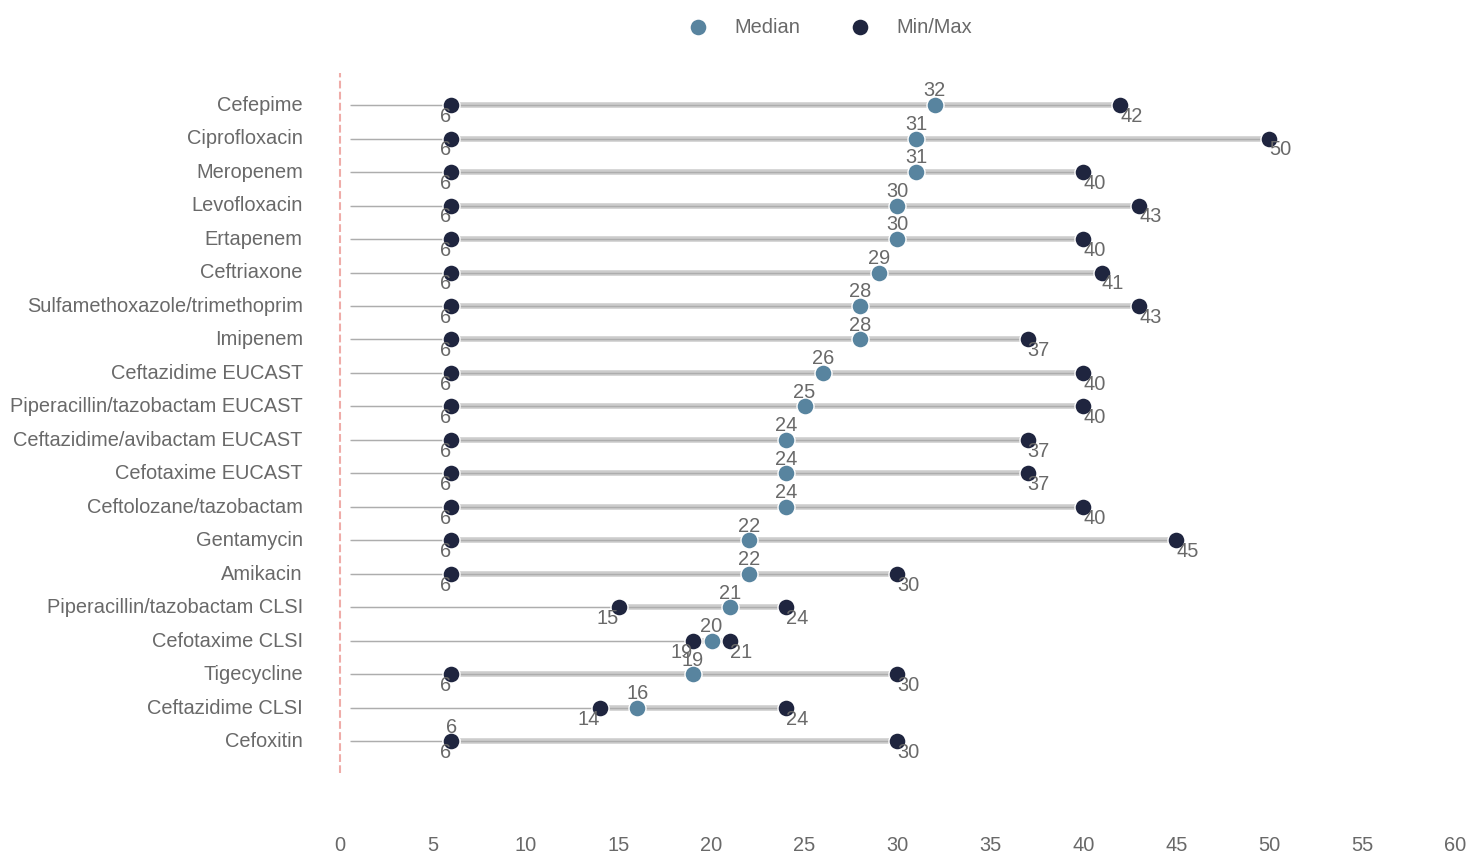

In [ ]:
plt.style.use("seaborn-whitegrid")  # set style because it looks nice
fig, ax = plt.subplots(1, 1, figsize=(15, 10),)


# color palette to choose from
darkblue = "#1f253f"
lightblue = "#58849f"
redish = "#d73027"

DOT_SIZE = 150

# create the various dots
# avg dot
ax.scatter(
    x=df["Median"],
    y=df["Antibiotic"],
    s=DOT_SIZE,
    alpha=1,
    label="Median",
    color=lightblue,
    edgecolors="white",
)



# min dot
ax.scatter(
    x=df["Min"],
    y=df["Antibiotic"],
    s=DOT_SIZE,
    alpha=1,
    color=darkblue,
    label="Min/Max",
    edgecolors="white",
)

# max dot
ax.scatter(
    x=df["Max"],
    y=df["Antibiotic"],
    s=DOT_SIZE,
    alpha=1,
    color=darkblue,
    edgecolors="white",
)


# create the horizontal line
# between min and max vals
ax.hlines(
    y=df["Antibiotic"],
    xmin=df["Min"],
    xmax=df["Max"],
    color="grey",
    alpha=0.4,
    lw=4, # line-width
    zorder=0, # make sure line at back
)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()


ax.plot([0.023, 0.023], [y_min, y_max], linestyle="-", color="white", linewidth=14)
ax.plot([0.023, 0.023], [y_min, y_max], linestyle="--", color=redish, alpha=0.4)




# dictionary used to map the column labels from df to a readable name


# iterate through each result and apply the text
# df should already be sorted
for i in range(0, df.shape[0]):
    # avg auc score
    ax.text(
        x=df["Median"][i],
        y=i + 0.15,
        s="{:.0f}".format(df["Median"][i]),
        horizontalalignment="center",
        verticalalignment="bottom",
        size="x-large",
        color="dimgrey",
        weight="medium",
    )

    # min auc score
    ax.text(
        x=df["Min"][i],
        y=i - 0.05,
        s="{:.0f}".format(df["Min"][i]),
        horizontalalignment="right",
        verticalalignment="top",
        size="x-large",
        color="dimgrey",
        weight="medium",
    )

    # max auc score
    ax.text(
        x=df["Max"][i],
        y=i - 0.05,
        s="{:.0f}".format(df["Max"][i]),
        horizontalalignment="left",
        verticalalignment="top",
        size="x-large",
        color="dimgrey",
        weight="medium",
    )

    # add thin leading lines towards classifier names
    # to the right of max dot
    ax.plot(
        [df["Max"][i] + 0.02, 0.6],
        [i, i],
        linewidth=1,
        color="grey",
        alpha=0.4,
        zorder=0,
    )

    # to the left of min dot
    ax.plot(
        [-0.05, df["Min"][i] - 0.02],
        [i, i],
        linewidth=1,
        color="grey",
        alpha=0.4,
        zorder=0,
    )

    # add classifier name text
    clf_name = df["Antibiotic"][i]
    ax.text(
        x=-2,
        y=i,
        s=clf_name,
        horizontalalignment="right",
        verticalalignment="center",
        size="x-large",
        color="dimgrey",
        weight="normal",
    )



# remove the y ticks
ax.set_yticks([])

# drop the gridlines (inherited from 'seaborn-whitegrid' style)
# and drop all the spines
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)



# custom set the xticks since this looks better
ax.set_xticks([0,5,10,15,20,25,30,35,40,45,50,55,60])

# set properties of xtick labels
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib.axes.Axes.tick_params
ax.tick_params(axis="x", pad=20, labelsize="x-large", labelcolor="dimgrey")


# create legend
ax.legend(
    frameon=False,
    bbox_to_anchor=(0.6, 1.05),
    ncol=2,
    fontsize="x-large",
    labelcolor="dimgrey",
)

# plt.savefig('best_results.svg',dpi=150, bbox_inches = "tight")
plt.show()
